### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import math
import itertools
from tqdm import tqdm
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

### Constant

In [2]:
LOCS = ["BKK", "Chiangmai", "Rayong", "Saraburi", "Khonkaen", "Surat"]
REGIONS = ['Thailand', 'Myanmar', 'Cambodia', 'Lao_PDR', 'P_Malaysia']

base_dataset_path = './datasci_dataset_2022'
base_processed_data_path = './processed_data'

## General Functions

In [3]:
def load_data(base_processed_data_path, PROVINCES, train = True):
    data = {}
    for province in PROVINCES:
        if (train):
            path = f'{base_processed_data_path}/{province}/{province.lower()}_train.csv'
        else:
            path = f'{base_processed_data_path}/{province}/{province.lower()}_test.csv'
            
        df = pd.read_csv(path)
        df['date_time'] = pd.to_datetime(df['date_time'], format = '%Y-%m-%d %H:%M:%S')
        df.sort_values(by = 'date_time', inplace = True)
        df.set_index('date_time', inplace = True)
        df.index.freq = '6h'
        data[province] = df
    return data

def get_current_dt():
    current_dt = datetime.now()
    return current_dt.strftime('%Y-%m-%d %H:%M:%S')

## Load train data

In [4]:
dfs_train = load_data(base_processed_data_path, LOCS, train = True)

## Example Train data

In [5]:
dfs_train['BKK'].head(50)

,PM2.5,wind_speed,wind_dir,temp,hotspot_thailand,hotspot_myanmar,hotspot_cambodia,hotspot_lao_pdr,hotspot_p_malaysia,month_1,...,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,wind_dir_sin,wind_dir_cos
date_time,,,,,,,,,,,,,,,,,,,,,
2017-07-01 06:00:00,23.0,17.0,242.0,27.8,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.8829,-0.4695
2017-07-01 12:00:00,15.0,18.0,250.0,32.6,0.0,0.0,1.0,0.0,1.0,0,...,0,0,1,0,0,0,0,0,-0.9397,-0.3420
2017-07-01 18:00:00,10.0,26.0,255.0,30.1,0.0,0.0,1.0,0.0,1.0,0,...,0,0,1,0,0,0,0,0,-0.9659,-0.2588
2017-07-02 00:00:00,17.0,20.0,262.0,28.1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.9903,-0.1392
2017-07-02 06:00:00,35.0,18.0,247.0,27.4,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.9205,-0.3907
2017-07-02 12:00:00,15.0,23.0,255.0,32.1,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.9659,-0.2588
2017-07-02 18:00:00,14.0,36.0,277.0,30.2,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.9925,0.1219
2017-07-03 00:00:00,11.0,33.0,290.0,27.9,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.9397,0.3420
2017-07-03 06:00:00,25.0,28.0,278.0,27.7,0.0,0.0,0.0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,-0.9903,0.1392


## Visualizing training data

### 1. Daily mean of PM2.5 for each provinces

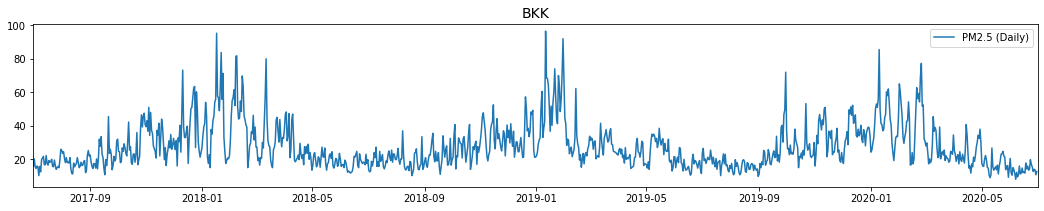

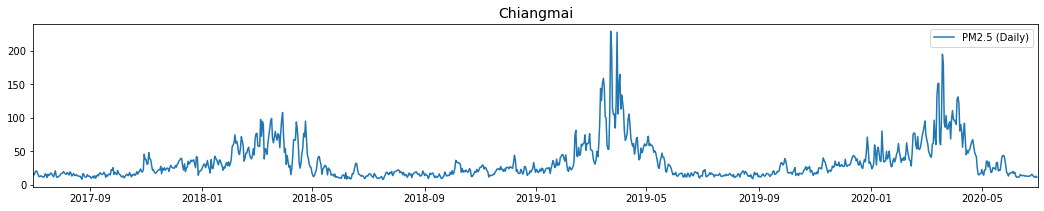

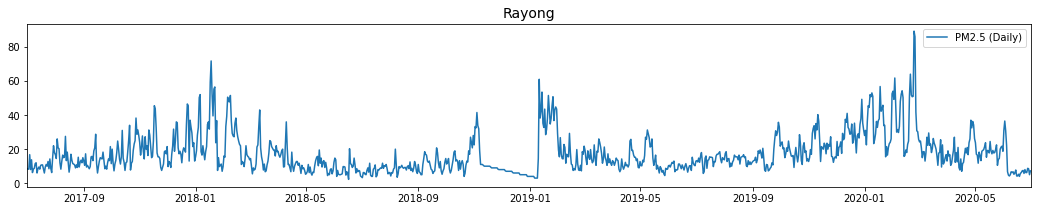

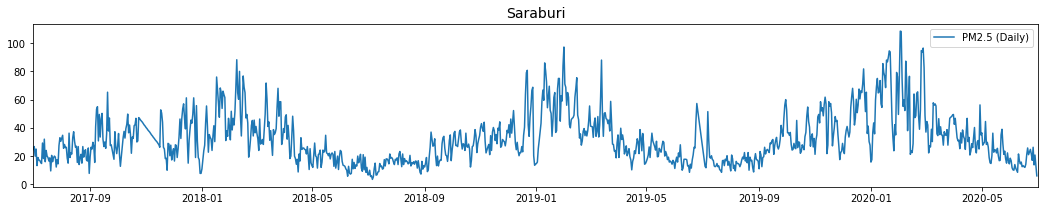

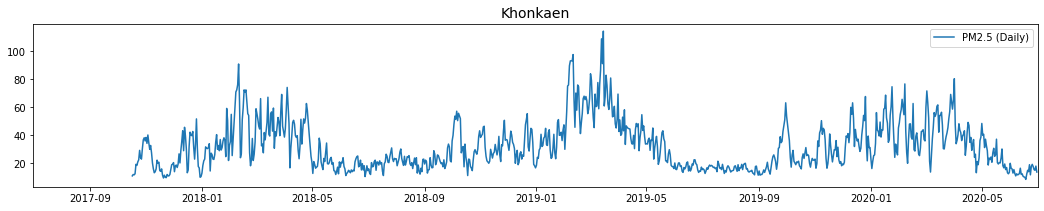

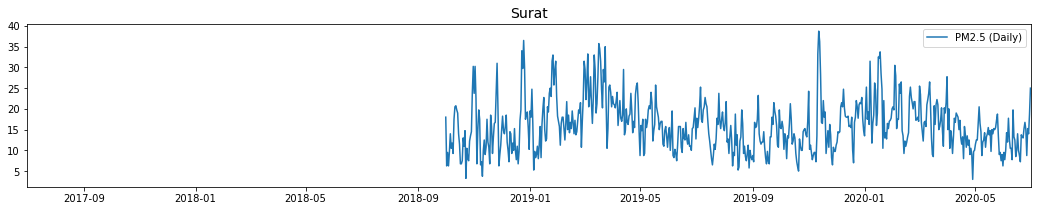

In [6]:
for province in LOCS:
    sample_df = dfs_train[province].resample('D').mean()
    plt.figure(figsize = (18, 3))
    plt.plot(sample_df.index, sample_df['PM2.5'], label = 'PM2.5 (Daily)')
    plt.title(province, fontsize = 14)
    plt.xlim([datetime(2017, 7, 1, 0, 0, 0), datetime(2020, 7, 1, 0, 0, 0)])
    plt.legend()
    plt.show()

### 2. Relation of hotspot count from regions to PM2.5 (daily)

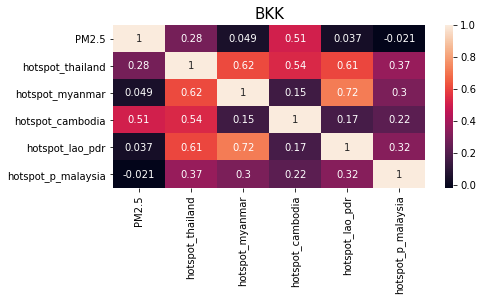

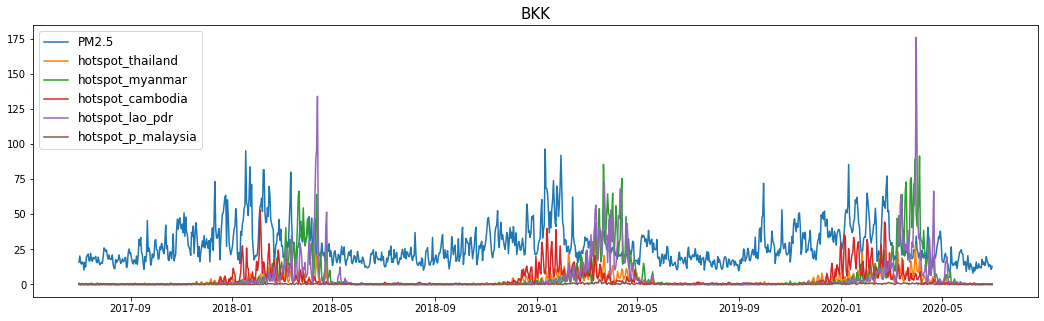

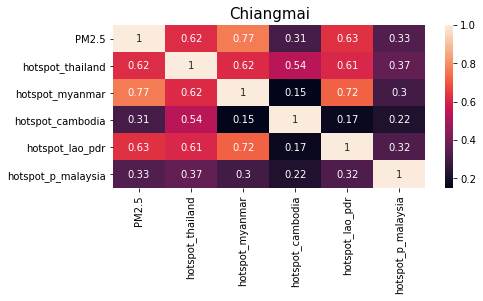

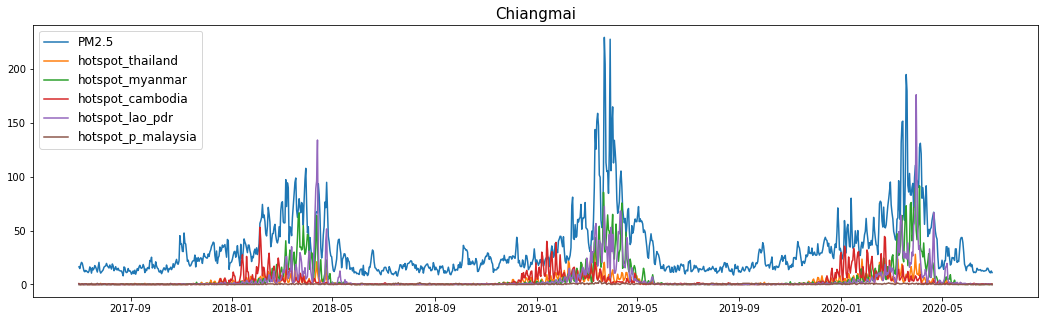

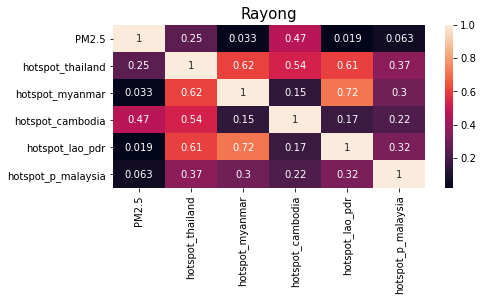

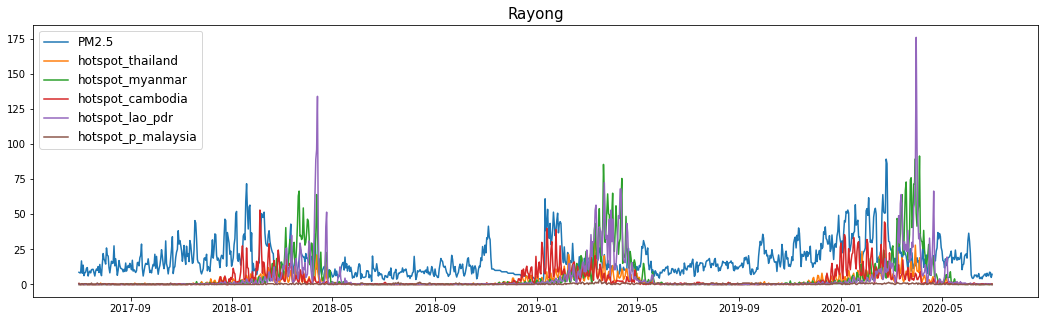

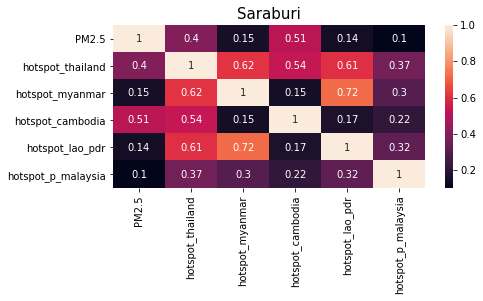

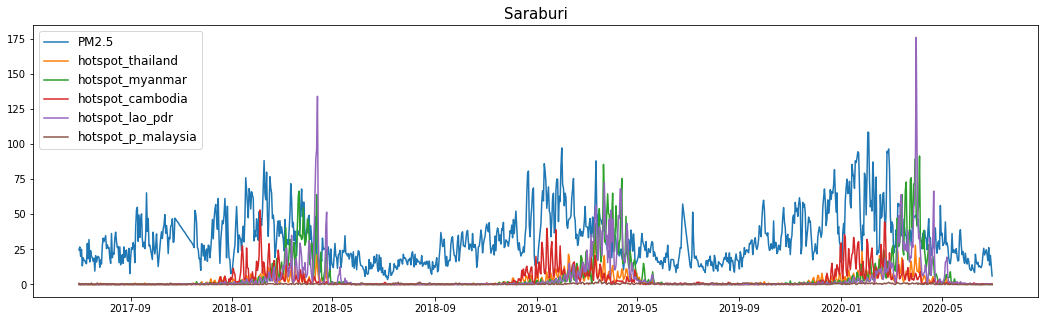

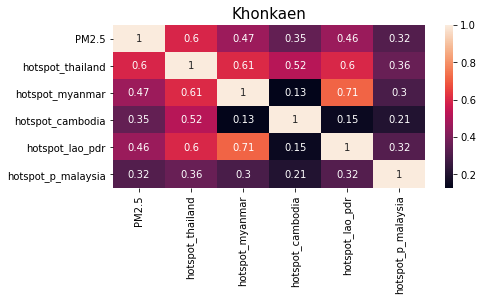

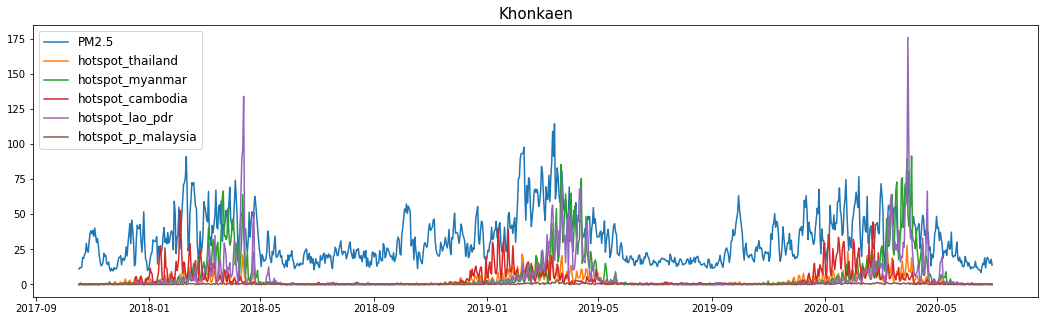

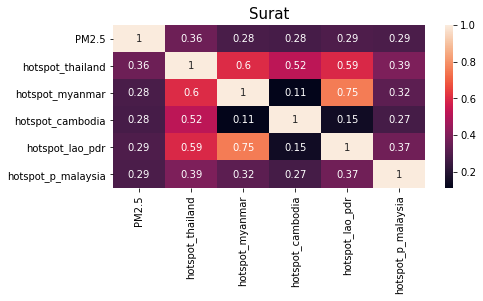

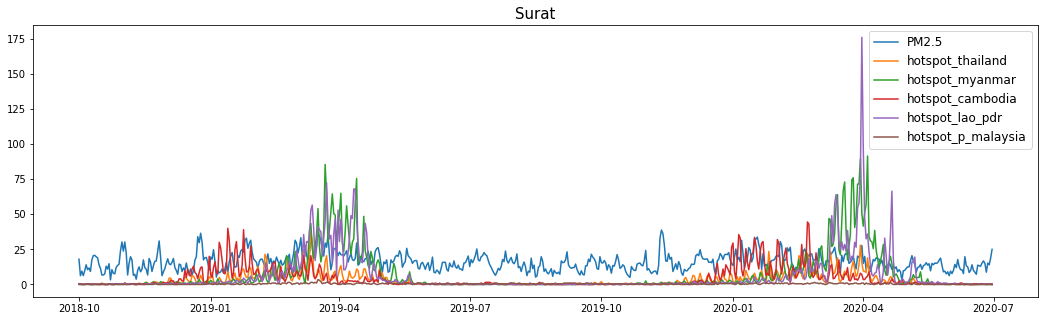

In [7]:
cols = ['PM2.5'] + [f'hotspot_{region.lower()}' for region in REGIONS]
for province in LOCS:
    sample_df = dfs_train[province][cols].resample('D').mean()

    # heatmap
    plt.figure(figsize = (7, 3))
    sns.heatmap(sample_df.corr(), annot = True)
    plt.title(province, fontsize = 15)
    plt.show()
    
    #graph
    plt.figure(figsize = (18, 5))
    for c in cols:
        plt.plot(sample_df.index, sample_df[c], label = c)
    plt.title(province, fontsize = 15)
    plt.legend(fontsize = 12)
    plt.show()


### 3. Historical PM2.5 (Monthly) 

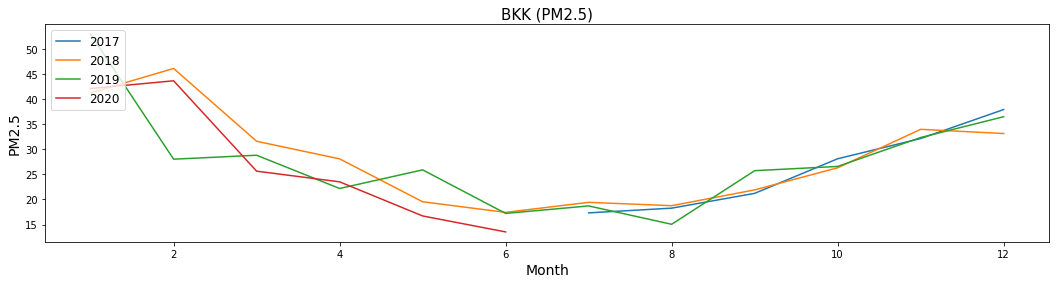

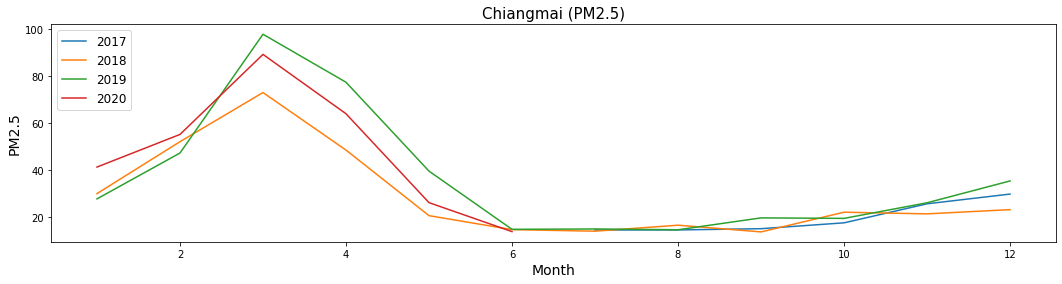

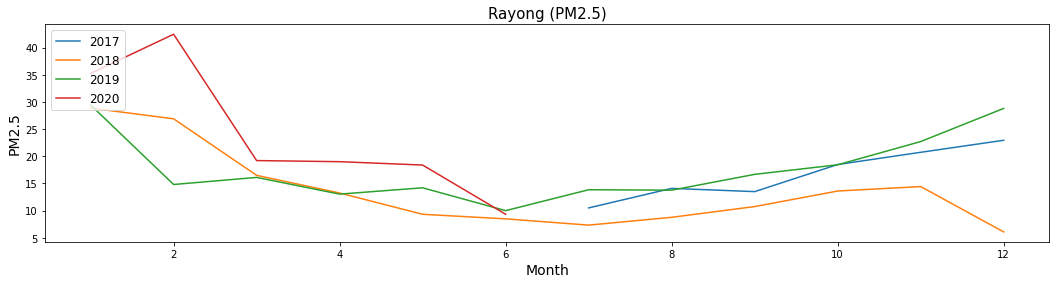

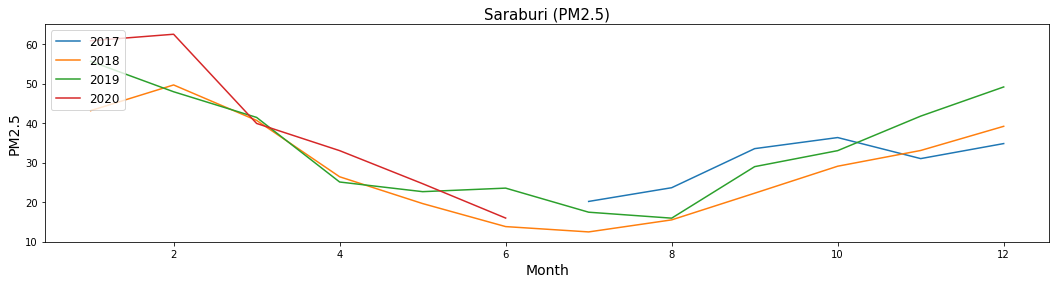

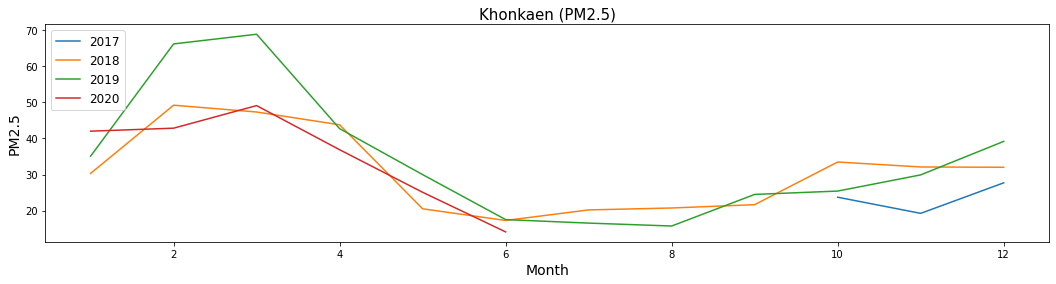

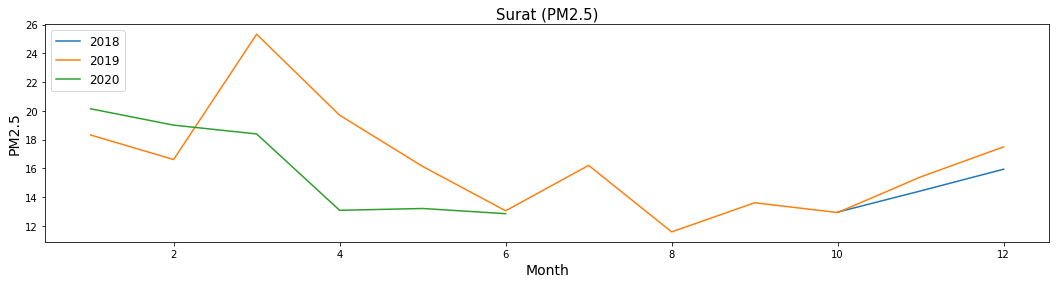

In [8]:
for province in LOCS:
    sample_df = dfs_train[province][['PM2.5']].copy().resample('M').mean()
    sample_df['month'] = sample_df.index.month
    sample_df['year'] = sample_df.index.year

    sample_df2 = sample_df.groupby(['year', 'month'])['PM2.5'].mean()
    sample_df2 = sample_df2.reset_index()
    
    unique_y = sample_df2['year'].unique()
    plt.figure(figsize = (18, 4))
    for y in unique_y:
        df = sample_df2.loc[sample_df2['year'] == y]
        plt.plot(df['month'], df['PM2.5'], label = y)
    plt.legend(fontsize = 12, loc = 'upper left')
    plt.title(f'{province} (PM2.5)', fontsize = 15)
    plt.xlabel('Month', fontsize = 14)
    plt.ylabel('PM2.5', fontsize = 14)
    plt.show()